<a href="https://colab.research.google.com/github/areegtarek/CISC-873-Data-Mining-W23/blob/main/Wish_website.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wish.com Product Rating Prediction**

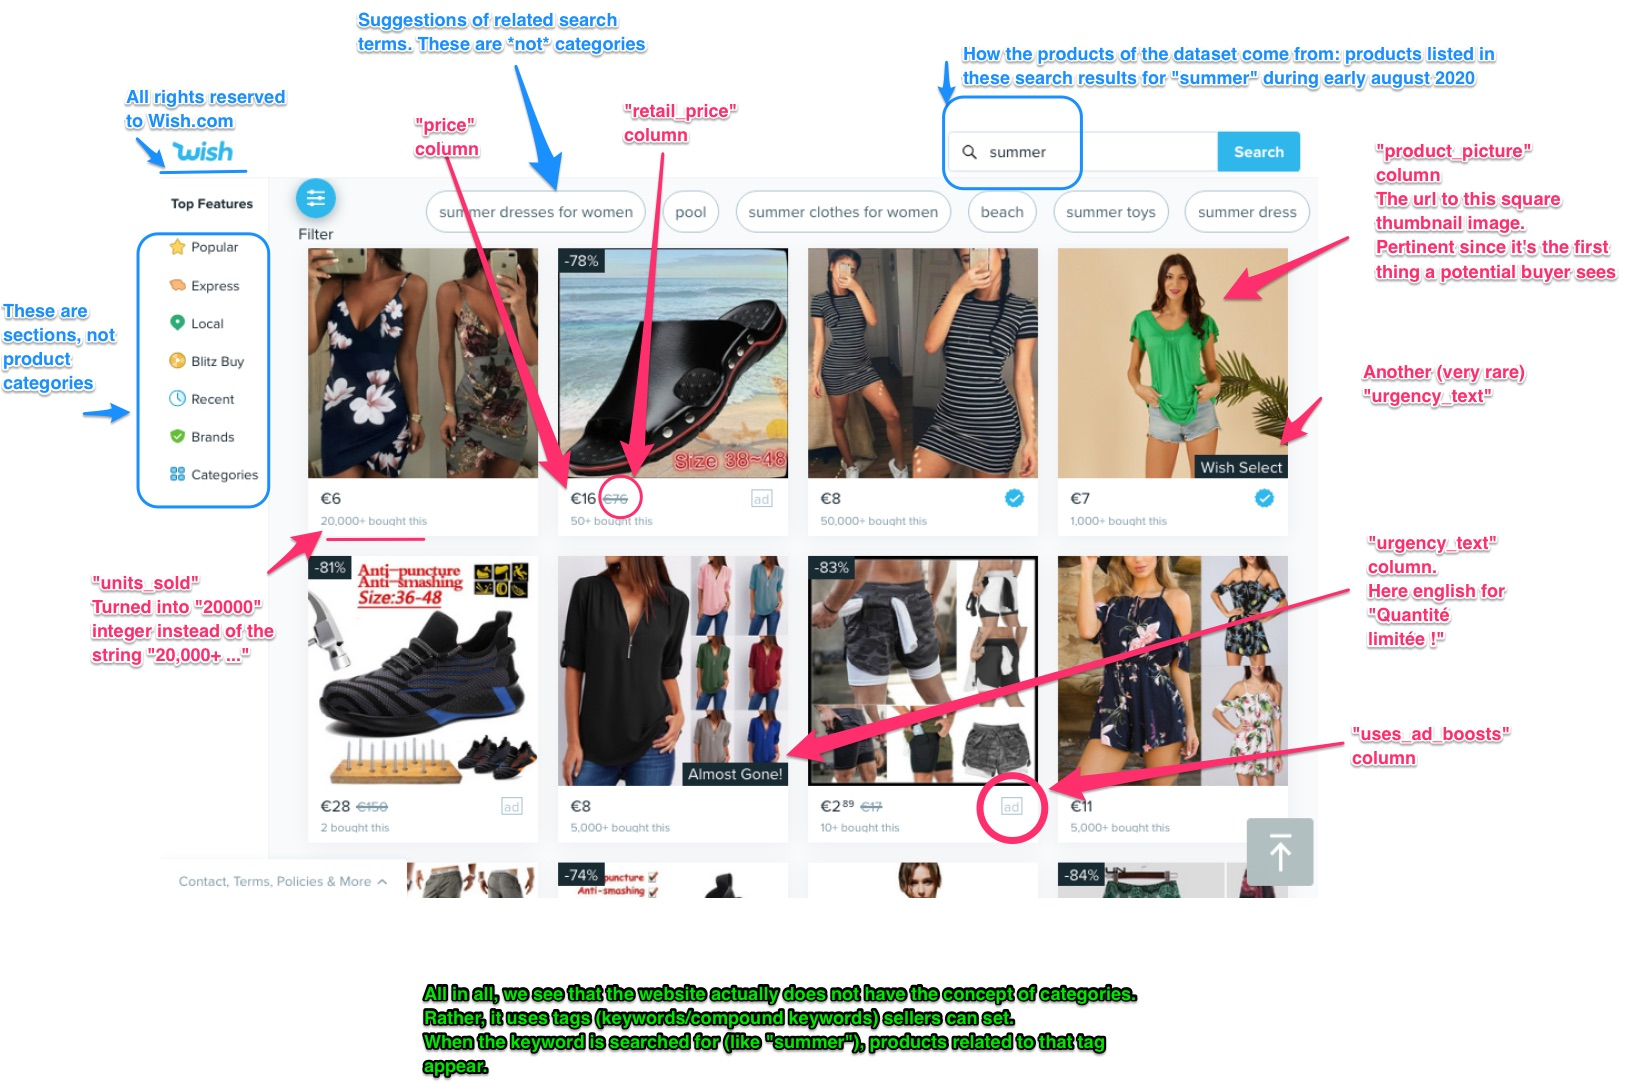

#**General Questions**

**1) Why Data Mining is a misnomer? What is another preferred name?**

- The term "data mining" is a misnomer, because the goal is the extraction of patterns and knowledge from large amounts of data, not the extraction (mining) of data itself
- Data mining is also known as Knowledge Discovery in Data (KDD).


**2) What is the general knowledge discovery process?**

  *the general knowledge discovery process is*

- Knowledge discovery can be defined as the process of identifying interesting and new patterns in data. 

- These patterns can include relations, events or trends, and they can reveal both exceptions and regularities.
- In the core of the process, data mining methods are utilized for extracting and verifying patterns.

*The general knowledge discovery process includes the following steps:*

- Data Selection: Determining which data to use for analysis.
- Data Cleaning: Identifying and correcting errors or inconsistencies in the data.
- Data Integration: Combining data from multiple sources into a single dataset.
- Data Transformation: Converting the data into a suitable format for analysis.
- Data Mining: Applying algorithms to identify patterns, relationships, and trends in the data.
- Pattern Evaluation: Assessing the patterns identified in step 5 to determine their usefulness and validity.
- Knowledge Representation: Presenting the patterns and insights in a useful and understandable format.
- Knowledge Utilization: Using the knowledge gained from the previous steps to make decisions or take actions.

**What is the difference between a data engineer and data scientist/AI engineer?**
- **Data engineer** comes from a strong technical background, typically in one of the STEM fields such as math or statistics.
 
>>They possess a master’s degree in data and a wealth of knowledge in programming languages such as Java and Python as well as SQL and NoSQL database systems. 
 
- **Data engineers** are focused on building and maintaining data infrastructures, data scientists tackle the data and interpret them. Data scientists typically come from technical backgrounds such as computer science, statistics, and mathematics.

- While most **Data scientists** acquire a master’s degree in data science, it is not a requirement

**3) In data mining, what is the difference between prediction and categorization?**

- Functionality

    >**Classification** is about determining a (categorial) class (or label) for an element in a dataset

    >**Prediction** is about predicting a missing/unknown element(continuous value) of a dataset

- Working Strategy

    >**In classification**, data is grouped into categories based on a training dataset.

    >In prediction, a classification/regression model is built to predict the outcome(continuous value)

**4) Why data science/machine learning is a bad idea in the context of information security?** 

While machine learning has proven to be promising in several application domains, our understanding of its behavior and limitations is still in its nascent stages.

One such domain is that of cybersecurity, where machine learning models are replacing traditional rule based systems, owing to their ability to generalize and deal with large scale attacks which are not seen before. 
However,the naive transfer of machine learning principles to the domain of security needs to be taken with caution.

Machine learning was not designed with security in mind and as such is prone to adversarial manipulation and reverse engineering. While most data based learning models rely on a static assumption of the world

**5) What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?**

- These three letters stand for confidentiality, integrity, and availability, otherwise known as the CIA triad. It is a model designed to guide policies for information security within an organization. 

>>**Confidentiality** is a set of rules that limits access to information. 

>>**Integrity** is the assurance that the information is trustworthy and accurate. 

>>**Availability** is a guarantee of reliable access to the information by authorized people only. 

* **Confidentiality (or privacy) attacks** aim to extract sensitive information from your AI system. 

* **Integrity attacks** make your AI model make a mistake so quietly. 

* **Availability attacks** aim to take your AI system down entirely. 

*If you can protect all three — you’ve got security covered.*

#**Problem Questions**

**Define the problem:**

The problem is predicting the products rating to gain prior knowledge of customers' preferences for products, which further improves the website's sales process.

**What is the input?** 

Inputs are some features specific to each product and is supposed to affect in some way the evaluation of the product

**What is the output?**

The output is the Rating of the products depends on contributing of some features that have an impact on the rating.

**What data mining function is required?**

The models used are classification models. I will use 3 different classification models which the are:
>Decision tree '2 different versions'

>SVM '2 different versions'

>Naive bayes '1 different versions'

**What could be the challenges?**

The challenges are that the dataset has a lot of problems which they are:
* containing different ranges needed to be scaled.
* containing some columns needed to be adjusted.
* containing many of missing values.
* containing Not important columns.
* containing catigorical columns.
* containing outliers.

That takes mush time for handling all those problems to obtain better performance from our models.

**What is the impact?**

Applying machine learning to this problem will improve the sales process on the website by developing ways to display products on the site to increase the purchase process for customers based on their similar evaluations and offer similar products to them

**What is an ideal solution?**

The ideal solution is to make the appropriate preprocessing on the important columns that will be important and positively affect predicting the right rating.

#**Import libraries**

In [97]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,CategoricalNB
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay 

In [98]:
#Mount the Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Concatinate Train & Test files**

In [99]:
# read the train csv file 
path1= '/content/drive/MyDrive/Data Mining&DL/wish.com/train_new.csv'
df1= pd.read_csv(path1)

# read the test csv file 
path2= '/content/drive/MyDrive/Data Mining&DL/wish.com/test_new.csv'
df2= pd.read_csv(path2)
df2['rating']= 0               # add rating column to test file with value 0; to adjust the dimension of two files

#concatenate the two files in one variable(df)
df= pd.concat([df1,df2], ignore_index=True, sort=False)

# **Exploratory Data Analysis(EDA)**

### Quick Exploration

In [100]:
# display the first 5 rows of data
df.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,...,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,...,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,...,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,...,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,...,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226


In [101]:
# shape of data
df.shape

(1573, 34)

In [102]:
# Calculate count, mean, std, min, 25%, 50%, 75%, max values for each column (statistical summary). 
round(df.describe())

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
count,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,473.0,1573.0,1573.0,1573.0,1573.0
mean,8.0,23.0,4339.0,0.0,3.0,890.0,0.0,0.0,0.0,0.0,33.0,2.0,0.0,40.0,50.0,1.0,26496.0,4.0,0.0,786.0
std,4.0,30.0,9357.0,0.0,2.0,1984.0,0.0,0.0,0.0,0.0,21.0,1.0,0.0,20.0,3.0,0.0,78474.0,0.0,0.0,454.0
min,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,6.0,1.0,1.0,0.0,2.0,0.0,0.0
25%,6.0,7.0,100.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,6.0,2.0,0.0,31.0,50.0,1.0,1987.0,4.0,0.0,393.0
50%,8.0,10.0,1000.0,0.0,4.0,150.0,0.0,0.0,0.0,0.0,50.0,2.0,0.0,40.0,50.0,1.0,7936.0,4.0,0.0,786.0
75%,11.0,26.0,5000.0,1.0,4.0,855.0,0.0,0.0,0.0,0.0,50.0,3.0,0.0,43.0,50.0,1.0,24564.0,4.0,0.0,1179.0
max,49.0,252.0,100000.0,1.0,6.0,20744.0,3.0,1.0,1.0,1.0,50.0,12.0,1.0,140.0,50.0,1.0,2174765.0,5.0,1.0,1572.0


**Observations** 

There is a difference between mean and median in some columns so the values are not normally distributed:

* The distribution is positively skewed **(Mean > Median)** in: 

    >retail_price, units_sold,rating_count, merchant_rating_count 

* The distribution is negatively skewed **(Mean < Median)** in: 
    >rating, product_variation_inventory

* The distribution is normally **(Mean = Median)** in other columns


In [103]:
#check duplicated values
df.duplicated().sum()

0

**Observasion:** There are no duplications in the data

In [104]:
# data info (id,name,count,dtype of each feature)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1573 non-null   float64
 1   retail_price                  1573 non-null   int64  
 2   currency_buyer                1573 non-null   object 
 3   units_sold                    1573 non-null   int64  
 4   uses_ad_boosts                1573 non-null   int64  
 5   rating                        1573 non-null   float64
 6   rating_count                  1573 non-null   int64  
 7   badges_count                  1573 non-null   int64  
 8   badge_local_product           1573 non-null   int64  
 9   badge_product_quality         1573 non-null   int64  
 10  badge_fast_shipping           1573 non-null   int64  
 11  tags                          1573 non-null   object 
 12  product_color                 1532 non-null   object 
 13  pro

**Observation #1:** Columns with object datatype can be converted to 'int' for convenience.

**Observation #2:** Some columns containing missing values.

In [105]:
# display column names that contain NaN values
df.columns[df.isna().any()].tolist()

#if we want to display them as dataframe 
#pd.DataFrame(df.columns[df.isna().any()], columns=['Features contain NaN values'])

['product_color',
 'product_variation_size_id',
 'has_urgency_banner',
 'urgency_text',
 'origin_country',
 'merchant_name',
 'merchant_info_subtitle',
 'merchant_profile_picture']

**Observation:** The above 8 columns contain missing values.

## **Data Cleaning**

#### Correlation and dealing with missing values

<Axes: >

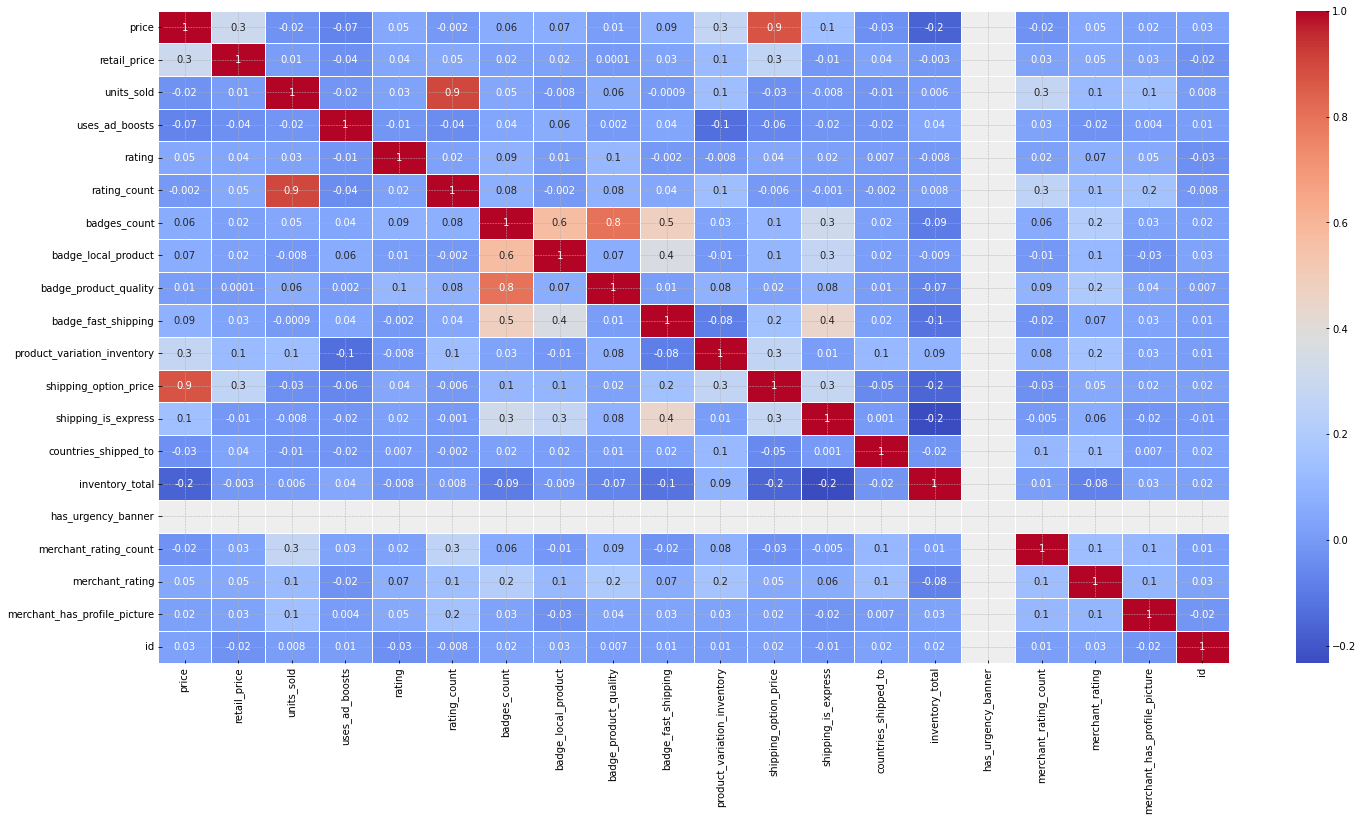

In [106]:
# display the correlation between the features
fig, ax = plt.subplots(figsize=(24,12))         # figsize
sns.heatmap(df.corr(),annot=True,linewidths=.5,fmt='.1g',cmap= 'coolwarm') # Heatmap for correlation matrix

In [107]:
# display the correlation between the features and the output(rating)
df.corr().loc['rating']

price                           0.047734
retail_price                    0.039670
units_sold                      0.030689
uses_ad_boosts                 -0.011796
rating                          1.000000
rating_count                    0.024608
badges_count                    0.088523
badge_local_product             0.010393
badge_product_quality           0.110506
badge_fast_shipping            -0.002165
product_variation_inventory    -0.008380
shipping_option_price           0.043286
shipping_is_express             0.018891
countries_shipped_to            0.007232
inventory_total                -0.008199
has_urgency_banner                   NaN
merchant_rating_count           0.017720
merchant_rating                 0.072626
merchant_has_profile_picture    0.054426
id                             -0.031826
Name: rating, dtype: float64

**Observation:** The NaN, in the case of **'has_urgency_banner'** column, is interpreted as no correlation between the two variables but that happens because of the NaN values so we need first to replace nan with zero, and then we will check the correlation again.

In [108]:
df['has_urgency_banner'] .unique()

array([nan,  1.])

In [109]:
#replace nan with zero if has banner=1 or not ==0 
df['has_urgency_banner'] = df['has_urgency_banner'].fillna(0).astype('int32')

In [110]:
df['has_urgency_banner'] .unique()

array([0, 1], dtype=int32)

In [111]:
# display the correlation between the features and the output(rating)
df.corr().loc['rating']

price                           0.047734
retail_price                    0.039670
units_sold                      0.030689
uses_ad_boosts                 -0.011796
rating                          1.000000
rating_count                    0.024608
badges_count                    0.088523
badge_local_product             0.010393
badge_product_quality           0.110506
badge_fast_shipping            -0.002165
product_variation_inventory    -0.008380
shipping_option_price           0.043286
shipping_is_express             0.018891
countries_shipped_to            0.007232
inventory_total                -0.008199
has_urgency_banner              0.047999
merchant_rating_count           0.017720
merchant_rating                 0.072626
merchant_has_profile_picture    0.054426
id                             -0.031826
Name: rating, dtype: float64

In [112]:
#Count the number of null values in each column
df.isnull().sum()

price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
has_urgency_banner                 0
urgency_text                    1100
origin_country                    17
merchant_title                     0
merchant_name                      4
merchant_info_subtitle             1
merchant_rating_count              0
m

In [113]:
# display the number of unique values for each column   
df.nunique()

price                            127
retail_price                     104
currency_buyer                     1
units_sold                        15
uses_ad_boosts                     2
rating                             7
rating_count                     761
badges_count                       4
badge_local_product                2
badge_product_quality              2
badge_fast_shipping                2
tags                            1230
product_color                    101
product_variation_size_id        106
product_variation_inventory       48
shipping_option_name              15
shipping_option_price              8
shipping_is_express                2
countries_shipped_to              94
inventory_total                   10
has_urgency_banner                 2
urgency_text                       2
origin_country                     6
merchant_title                   958
merchant_name                    957
merchant_info_subtitle          1058
merchant_rating_count            917
m

**Observation:** There are some columns that have only one unique value, we must drop them later as they won't affect our classification

In [114]:
# columns that contain one unique value
df.columns[df.nunique()==1].tolist()

['currency_buyer', 'theme', 'crawl_month']

In [115]:
df['urgency_text'] .unique()

array([nan, 'Quantité limitée !', 'Réduction sur les achats en gros'],
      dtype=object)

In [116]:
#fill nan with 'None' = is not 'Limited quantity!' or 'Discount on bulk purchases'
df['urgency_text'] = df['urgency_text'].fillna("None")

In [117]:
df['urgency_text'] .unique()

array(['None', 'Quantité limitée !', 'Réduction sur les achats en gros'],
      dtype=object)

In [118]:
#display the unique values with its count in the column
df['urgency_text'].value_counts()

None                                1100
Quantité limitée !                   472
Réduction sur les achats en gros       1
Name: urgency_text, dtype: int64

In [119]:
#display the unique values with its count in the column
df['merchant_profile_picture'].value_counts()

https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5acaf29d5ebcfd72403106a8.jpg    12
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5533c83986ff95173dc017d0.jpg     8
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_58ad449708de0c6dc59d9e06.jpg     6
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_55c8a4c33a698c6010edcd9e.jpg     6
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_577fb2b368116418674befd9.jpg     5
                                                                                                       ..
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_58a3f270e269ee522580e6bb.jpg     1
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_547465748edcfa6ceab14f70.jpg     1
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_56db028b3a9cb801c374b3c6.jpg     1
https://s3-us-west-1.amazonaws.com/sweeper-pro

**Observasions**

* Product color and size variation have 29 and 12 null values respectively. Perhaps these products have no variations?

* Origin countries have 12 null values. I might replace this with the mode if necessary.

* Surprisingly there are 4 missing merchant names.

* There are 924 missing merchant profile pictures. I am expecting this to match with 'zeros' in 'merchant_has_profile_picture'.

* There are 1100 missing values in 'urgency_text', here nan has meaning, so I replaced them with None, we might drop it because the most values has no urgency_text

* The 'merchant_profile_picture' column seems to have many missing values. I might drop it but first, we should be sure if it is necessary or not.

In [120]:
#Count the number of null values in each column
df.isnull().sum()

price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
has_urgency_banner                 0
urgency_text                       0
origin_country                    17
merchant_title                     0
merchant_name                      4
merchant_info_subtitle             1
merchant_rating_count              0
m

*Check the features which are highly correlated*

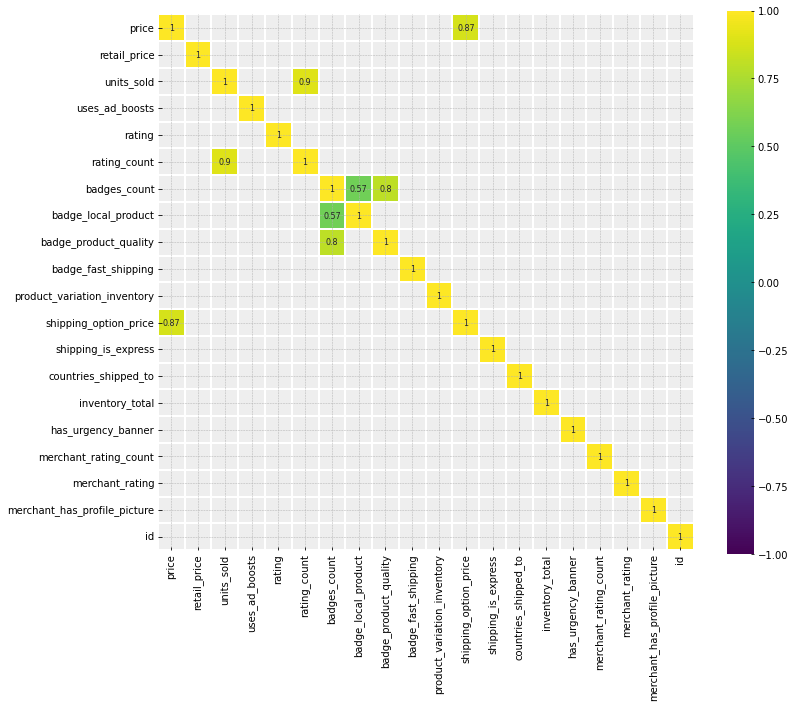

In [121]:
%matplotlib inline
plt.style.use('bmh')
corr = df.corr() # We already examined correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

**Observasion:** There are some columns with highly strong correlation 

#### Dealing with Categorical Columns

##### The Target (Rating)

In [122]:
#Frequency distribution of classes"
outcome = pd.crosstab(index=df["rating"],  # Make a crosstab
                              columns="count")      # Name the count column
 
outcome

col_0,count
rating,
0.0,479
1.0,2
2.0,12
3.0,135
4.0,774
5.0,170
6.0,1


**Observasion:**

*  The range of rating is from 1 to 6.
*  0 rating isnot included as it is for test data file which we added myself at the begining. 

In [123]:
#Drop values has rate equal 6
df= df[df['rating'] < 6 ].reset_index(drop=True)

##### origin_country Column

In [124]:
#display the unique values for the column
df['origin_country'].unique()

array(['CN', 'US', 'GB', nan, 'SG', 'VE', 'AT'], dtype=object)

In [125]:
#display the output value counts for each unique value
df['origin_country'].value_counts()

CN    1515
US      31
VE       5
SG       2
GB       1
AT       1
Name: origin_country, dtype: int64

**Observasion:** It is seemed that most of the products China is their origion country, so we might drop it.

#####merchant_info_subtitle

In [126]:
#display the unique values for the column
df['merchant_info_subtitle'].unique()

array(['88 % avis positifs (66,644 notes)',
       '91 % avis positifs (25,752 notes)',
       '83 % avis positifs (3,897 notes)', ..., '(14,974 notes)',
       '70 % avis positifs (572 notes)',
       '87 % avis positifs (1,086 notes)'], dtype=object)

In [127]:
#display the output value counts for each unique value
df['merchant_info_subtitle'].value_counts()

83 % avis positifs (32,168 notes)    14
86 % avis positifs (12,309 notes)    11
87 % avis positifs (42,919 notes)     8
85 % avis positifs (80,093 notes)     7
84 % avis positifs (36,361 notes)     6
                                     ..
77 % avis positifs (849 notes)        1
82 % avis positifs (870 notes)        1
90 % avis positifs (6,033 notes)      1
(12,913 notes)                        1
87 % avis positifs (1,086 notes)      1
Name: merchant_info_subtitle, Length: 1057, dtype: int64

**Observasion:** we can get from this column the percentage of the positive reviews.

#####shipping_is_express

In [128]:
#display the unique values for the column
df['shipping_is_express'].unique()

array([0, 1])

In [129]:
#display the output value counts for each unique value
df['shipping_is_express'].value_counts()

0    1569
1       3
Name: shipping_is_express, dtype: int64

**Observasion:** It seems that most of products arenot shipping express. So we might drop this cloumn.

#####shipping_option_name

In [130]:
#display the unique values for the column
df['shipping_option_name'].unique()

array(['Livraison standard', 'Standard Shipping', 'الشحن القياسي',
       'Expediere Standard', 'Envío normal', 'Standardowa wysyłka',
       'Envio Padrão', 'Standardversand', 'Spedizione standard',
       'Standart Gönderi', 'Livraison Express', 'ការដឹកជញ្ជូនតាមស្តង់ដារ',
       'Стандартная доставка', 'การส่งสินค้ามาตรฐาน',
       'Ekspresowa wysyłka'], dtype=object)

In [131]:
#display the output value counts for each unique value
df['shipping_option_name'].value_counts()

Livraison standard         1508
Standard Shipping            21
Envio Padrão                  9
Expediere Standard            6
Envío normal                  5
الشحن القياسي                 4
Standardowa wysyłka           3
Standardversand               3
Стандартная доставка          3
Spedizione standard           2
Standart Gönderi              2
Livraison Express             2
การส่งสินค้ามาตรฐาน           2
ការដឹកជញ្ជូនតាមស្តង់ដារ       1
Ekspresowa wysyłka            1
Name: shipping_option_name, dtype: int64

**Observasion:** It seems that it has the same shipping option name value in a different language. So will drop this column.

#####inventory_total

In [132]:
#display the unique values for the column
df['inventory_total'].unique()

array([50,  1,  9, 37, 36, 24,  2, 38, 30, 40])

In [133]:
#display the output value counts for each unique value
df['inventory_total'].value_counts()

50    1563
1        1
9        1
37       1
36       1
24       1
2        1
38       1
30       1
40       1
Name: inventory_total, dtype: int64

**Observasion:** It seems that most of the products' inventory total value is 50. So we will drop this column.

#####product_color

In [134]:
#display the unique values for the column
df['product_color'].unique()

array(['yellow', 'black', 'white', 'lakeblue', 'apricot', 'brown',
       'winered', 'blue', 'red', 'navyblue', 'green', 'khaki', 'White',
       'white & green', 'multicolor', 'lightpink', 'pink', 'RED',
       'armygreen', 'lightblue', nan, 'coffee', 'grey', 'skyblue',
       'watermelonred', 'pink & black', 'whitefloral', 'purple', 'navy',
       'pink & white', 'rosered', 'orange', 'Black', 'mintgreen',
       'leopardprint', 'gray', 'navy blue', 'star', 'rose', 'lightyellow',
       'camouflage', 'black & yellow', 'whitestripe', 'navyblue & white',
       'black & blue', 'lightred', 'violet', 'gold', 'black & green',
       'white & black', 'burgundy', 'black & white', 'lightgrey',
       'coolblack', 'lightgreen', 'beige', 'darkblue', 'darkgreen',
       'silver', 'wine red', 'Army green', 'pink & blue', 'rainbow',
       'claret', 'floral', 'brown & yellow', 'light green', 'Pink',
       'blue & pink', 'dustypink', 'camel', 'orange-red', 'rosegold',
       'ivory', 'fluorescentg

**Observasion:** There are some errors in labelling the color. 



#####product_variation_size_id

In [135]:
#display the unique values for the column
df['product_variation_size_id'].unique()

array(['M', 'L', 'XS', 'S', 'XL', '26(Waist 72cm 28inch)', 'S.',
       'S(bust 88cm)', 'XXS', 's', '29', nan, 'choose a size', 'XXXS',
       'Base Coat', 'Size M', 'XXL', 'M.', 'XS.',
       '100 x 100cm(39.3 x 39.3inch)', '2pcs', '4XL', '1', '25-S',
       'Size-XXS', '5PAIRS', '35', 'Pack of 1', 'Size S', 'Size-S', '6XL',
       '25', 'S/M(child)', '60', 'Size-XS', 'S (waist58-62cm)',
       'SIZE XXS', '10 ml', 'X   L', 'Women Size 36', '04-3XL',
       'Size -XXS', '1 pc.', 'Floating Chair for Kid', 'S Pink', '34',
       'US-S', 'Size XXS', 'pants-S', 'XXXXL', 'SIZE-XXS', 'SIZE XS',
       '1pc', 'Size S.', '100 cm', 'S..', 'Round', '4-5 Years', '5', '33',
       '30 cm', '2', 'XXXXXL', '20PCS-10PAIRS', '2XL', 'Size-5XL',
       'Size4XL', 'One Size', 'size S', 'Size/S', 'B', 'SizeL', '20pcs',
       '1 PC - XL', 'Suit-S', 'Base & Top & Matte Top Coat',
       'Baby Float Boat', '1m by 3m', 'SIZE S', 'White', '40 cm', '5XL',
       '10pcs', 'H01', 'S(Pink & Black)', '32/L', 'dau

**Observasion:** There are some errors in labelling the size. 

In [136]:
#display the output value counts for each unique value
df['product_variation_size_id'].value_counts()

S                641
XS               356
M                200
XXS              100
L                 49
                ... 
XXXXXL             1
20PCS-10PAIRS      1
Size-5XL           1
Size/S             1
36                 1
Name: product_variation_size_id, Length: 106, dtype: int64

**Observasion:** There are also some outliers in sizes should be handled.

#**Preprocessing Data**


##**Drop the unnecessary columns**




In [137]:
df.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,...,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,...,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,...,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,...,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,...,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226


In [138]:
#Drop some columns that have problems
#one unique value:'currency_buyer', 'theme', 'crawl_month','shipping_option_name'
#have many missing values: 'merchant_profile_picture'
#imbalanced features (contain less values in other indices): 'merchant_profile_picture','origin_country','shipping_is_express'
#Also some columns that are unnecessary like(id,merchant_id,merchant_title,merchant_name)
df_new= df.drop(['currency_buyer', 'theme', 'crawl_month','shipping_option_name',
                 'merchant_profile_picture','origin_country','shipping_is_express',
                 'id','merchant_id','merchant_title','merchant_name'],axis=1)

df_new.shape

(1572, 23)

In [139]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1572 non-null   float64
 1   retail_price                  1572 non-null   int64  
 2   units_sold                    1572 non-null   int64  
 3   uses_ad_boosts                1572 non-null   int64  
 4   rating                        1572 non-null   float64
 5   rating_count                  1572 non-null   int64  
 6   badges_count                  1572 non-null   int64  
 7   badge_local_product           1572 non-null   int64  
 8   badge_product_quality         1572 non-null   int64  
 9   badge_fast_shipping           1572 non-null   int64  
 10  tags                          1572 non-null   object 
 11  product_color                 1531 non-null   object 
 12  product_variation_size_id     1558 non-null   object 
 13  pro

##**Feature Engineering & Adjusting some columns**

###merchant_info_subtitle

In [140]:
#extracting the percentage from the 'merchant_info_subtitle' column
import re
def getPercentage(x): 
    match = re.search(r'\d+%', str(x))
    if match is None:
        return None
    else:
        return float(match.group().rstrip("%"))
df_new['merchant_info_subtitle'] = df_new['merchant_info_subtitle'].str.replace(' ', '')
df_new['merchant_positive_pct'] = df_new['merchant_info_subtitle'].apply(getPercentage)
df_new['merchant_positive_pct'].head()

0    88.0
1    91.0
2    83.0
3    87.0
4    91.0
Name: merchant_positive_pct, dtype: float64

In [141]:
#filling missing data with the mean
df_new['merchant_positive_pct'].fillna((df_new['merchant_positive_pct'].mean()), inplace=True)

In [142]:
#drop the original column
df_new.drop(['merchant_info_subtitle'], axis=1, inplace=True)

df_new.shape

(1572, 23)

###product_color

In [143]:
#adjust colors label
df_new['product_color'].replace('White','white', inplace=True)
df_new['product_color'].replace('Black','black', inplace=True)
df_new['product_color'].replace('RED','red', inplace=True)
df_new['product_color'].replace('Blue','blue', inplace=True)
df_new['product_color'].replace('grey','gray', inplace=True)

In [144]:
df_new['product_color'].value_counts()

black               305
white               257
yellow              105
blue                100
pink                 99
                   ... 
rosegold              1
ivory                 1
winered & yellow      1
offwhite              1
gray & white          1
Name: product_color, Length: 95, dtype: int64

In [145]:
#filling missing data with the mode(black)
df_new['product_color'].replace(np.nan,'black', inplace=True)

###product_variation_size_id



In [146]:
#display unique values in column
df_new['product_variation_size_id'].unique()

array(['M', 'L', 'XS', 'S', 'XL', '26(Waist 72cm 28inch)', 'S.',
       'S(bust 88cm)', 'XXS', 's', '29', nan, 'choose a size', 'XXXS',
       'Base Coat', 'Size M', 'XXL', 'M.', 'XS.',
       '100 x 100cm(39.3 x 39.3inch)', '2pcs', '4XL', '1', '25-S',
       'Size-XXS', '5PAIRS', '35', 'Pack of 1', 'Size S', 'Size-S', '6XL',
       '25', 'S/M(child)', '60', 'Size-XS', 'S (waist58-62cm)',
       'SIZE XXS', '10 ml', 'X   L', 'Women Size 36', '04-3XL',
       'Size -XXS', '1 pc.', 'Floating Chair for Kid', 'S Pink', '34',
       'US-S', 'Size XXS', 'pants-S', 'XXXXL', 'SIZE-XXS', 'SIZE XS',
       '1pc', 'Size S.', '100 cm', 'S..', 'Round', '4-5 Years', '5', '33',
       '30 cm', '2', 'XXXXXL', '20PCS-10PAIRS', '2XL', 'Size-5XL',
       'Size4XL', 'One Size', 'size S', 'Size/S', 'B', 'SizeL', '20pcs',
       '1 PC - XL', 'Suit-S', 'Base & Top & Matte Top Coat',
       'Baby Float Boat', '1m by 3m', 'SIZE S', 'White', '40 cm', '5XL',
       '10pcs', 'H01', 'S(Pink & Black)', '32/L', 'dau

In [147]:
#adjust size label
df_new['product_variation_size_id'].replace(['S.','s','size S','Size S.','Size/S',
       'SIZE S','Size S','Suit-S','S..','Size S.''Size S','Size-S','25-S','S Pink',
       'US-S','Size--S','S/M(child)','pants-S','S (waist58-62cm)','S(Pink & Black)',
       'S Diameter 30cm'],'S', inplace=True)

df_new['product_variation_size_id'].replace(['M.','Size M'],'M', inplace=True)
df_new['product_variation_size_id'].replace(['SizeL','Size-L','L.','32/L'],'L', inplace=True)
df_new['product_variation_size_id'].replace(['SIZE XXS','Size -XXS','Size XXS','SIZE-XXS','Size-XXS'],'XXS', inplace=True)
df_new['product_variation_size_id'].replace(['X   L','1 PC - XL'],'XL', inplace=True)
df_new['product_variation_size_id'].replace(['XS.','SIZE XS','Size-XS','S(bust 88cm)'],'XS', inplace=True)
df_new['product_variation_size_id'].replace(['XXXXXL','Size-5XL'],'5XL', inplace=True)
df_new['product_variation_size_id'].replace(['XXXXL','Size4XL','04-3XL','SIZE-4XL'],'4XL', inplace=True)
df_new['product_variation_size_id'].replace('XXXL','3XL', inplace=True) 


df_new['product_variation_size_id'].replace(['choose a size','6XL' ,'26(Waist 72cm 28inch)', '29',
      'Base Coat', '100 x 100cm(39.3 x 39.3inch)', '2pcs', '1', '5PAIRS', '35',
       'Pack of 1', '25', '60', '10 ml', 'Women Size 36', '1 pc.',
       'Floating Chair for Kid', '34', '1pc', '100 cm', 'Round','4-5 Years', '5',
       '33', '30 cm', '2', '20PCS-10PAIRS','One Size', 'B', '20pcs', '4',
       'Base & Top & Matte Top Coat', 'Baby Float Boat', '1m by 3m',
       'White', '40 cm', '10pcs', 'H01','daughter 24M', '80 X 200 CM', 'EU 35',
       '100pcs', 'first  generation',  'Women Size 37','AU plug Low quality',
       '3 layered anklet', '17', 'US 6.5 (EU 37)', 'US5.5-EU35','EU39(US8)', '36'],'other', inplace=True) 

In [148]:
#display unique values in column
df_new['product_variation_size_id'].unique()

array(['M', 'L', 'XS', 'S', 'XL', 'other', 'XXS', nan, 'XXXS', 'XXL',
       '4XL', '5XL', '2XL', '3XL'], dtype=object)

In [149]:
df_new['product_variation_size_id'].value_counts()

S        691
XS       371
M        206
XXS      107
other     66
L         55
XL        19
XXL       15
4XL       11
XXXS       6
5XL        4
2XL        4
3XL        3
Name: product_variation_size_id, dtype: int64

In [150]:
#filling missing data with the mode(S)
df_new['product_variation_size_id'].replace(np.nan,'S', inplace=True)

##Encoding the catigorical columns





In [151]:
#making sure there are no object columns
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1572 non-null   float64
 1   retail_price                  1572 non-null   int64  
 2   units_sold                    1572 non-null   int64  
 3   uses_ad_boosts                1572 non-null   int64  
 4   rating                        1572 non-null   float64
 5   rating_count                  1572 non-null   int64  
 6   badges_count                  1572 non-null   int64  
 7   badge_local_product           1572 non-null   int64  
 8   badge_product_quality         1572 non-null   int64  
 9   badge_fast_shipping           1572 non-null   int64  
 10  tags                          1572 non-null   object 
 11  product_color                 1572 non-null   object 
 12  product_variation_size_id     1572 non-null   object 
 13  pro

In [152]:
#list of columns that contain catigorical values
catigorical_cols= ['product_color','product_variation_size_id','tags','urgency_text']

In [153]:
#apply one hot encoding on catigorical data to be numerical data
encoder= LabelEncoder()
#encoder = OneHotEncoder()    #.toarray()

for i in catigorical_cols:
    df_new[i]= encoder.fit_transform(np.asarray(df_new[i]).reshape(-1,1))

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

**#Result:** All object values have converted to integers

In [154]:
#making sure there are no object columns
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1572 non-null   float64
 1   retail_price                  1572 non-null   int64  
 2   units_sold                    1572 non-null   int64  
 3   uses_ad_boosts                1572 non-null   int64  
 4   rating                        1572 non-null   float64
 5   rating_count                  1572 non-null   int64  
 6   badges_count                  1572 non-null   int64  
 7   badge_local_product           1572 non-null   int64  
 8   badge_product_quality         1572 non-null   int64  
 9   badge_fast_shipping           1572 non-null   int64  
 10  tags                          1572 non-null   int64  
 11  product_color                 1572 non-null   int64  
 12  product_variation_size_id     1572 non-null   int64  
 13  pro

In [155]:
#Looking for Negative Values
(df_new < 0).values.any()

False

**#Result:** There are no negative values in the data.

##**Dealing with Outliers**

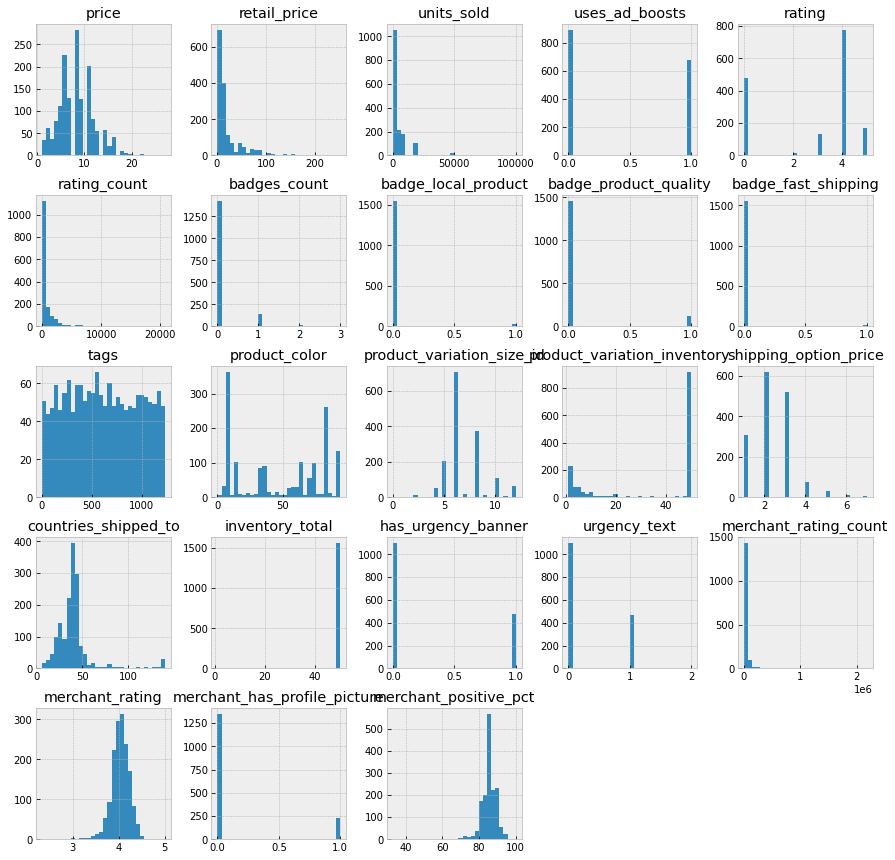

In [156]:
#plot the histogram for each column
%matplotlib inline
df_new.hist(bins=30, figsize=(15, 15))
plt.show()

**Observation:** Many columns seems to possess outliers.

##**Data Normalization**

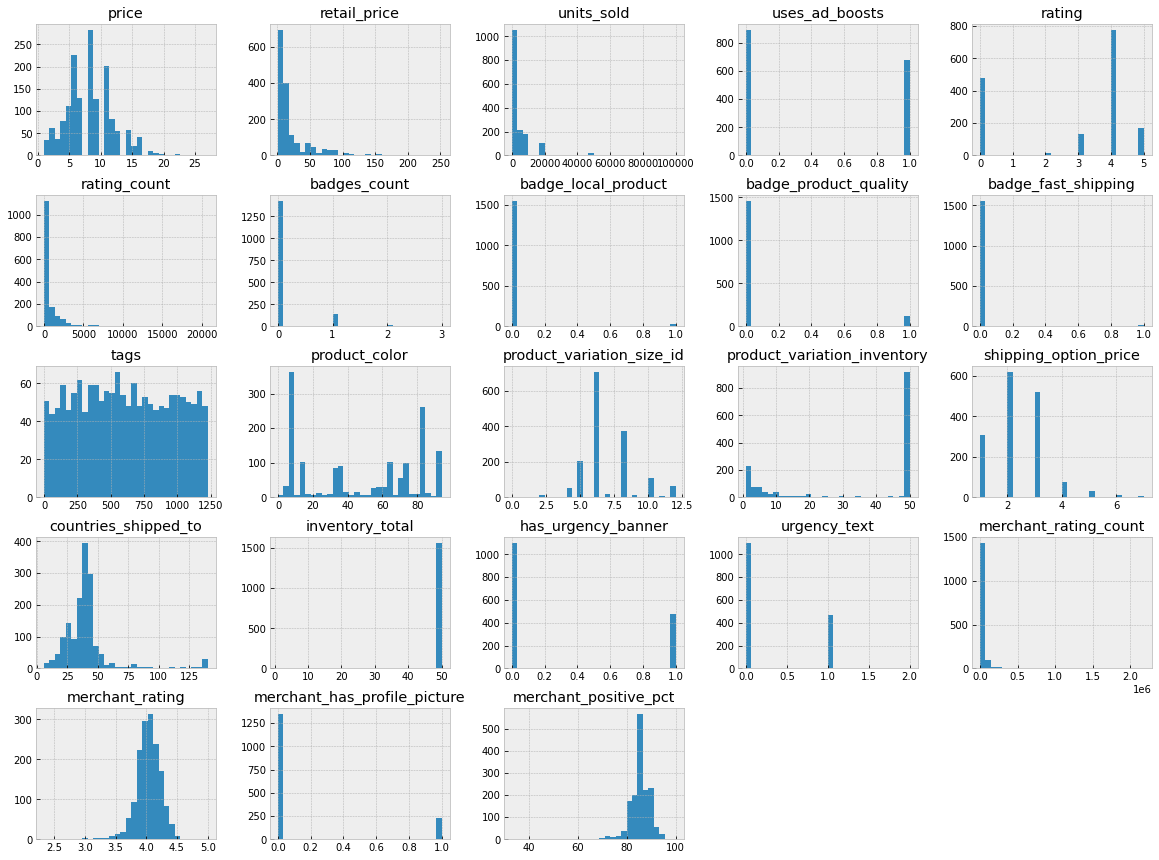

In [157]:
#plot the histogram for each column
%matplotlib inline
df_new.hist(bins=30, figsize=(20, 15))
plt.show()

**Observation** Histogram show that the feilds like `rating_count`, `units_sold`, `retail_price` are
highly skewed therefore taking their log to normalize the distribution.

<ipython-input-158-a86b0d594808>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['price'], fit=norm)


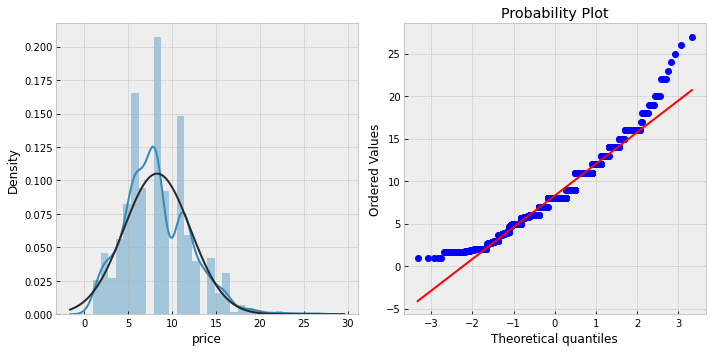

In [158]:
### performing a log transformation
%matplotlib inline
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df_new['price'], fit=norm)

plt.subplot(1,2,2)
res = stats.probplot(df_new['price'], plot=plt)
plt.tight_layout()

<ipython-input-159-fb0b735aec0d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['retail_price'], fit=norm)


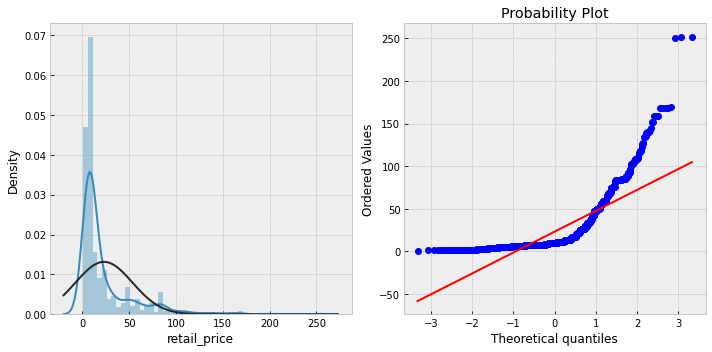

In [159]:
### performing a log transformation
%matplotlib inline
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df_new['retail_price'], fit=norm)

plt.subplot(1,2,2)
res = stats.probplot(df_new['retail_price'], plot=plt)
plt.tight_layout()

<ipython-input-160-96c905065349>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['units_sold'], fit=norm)


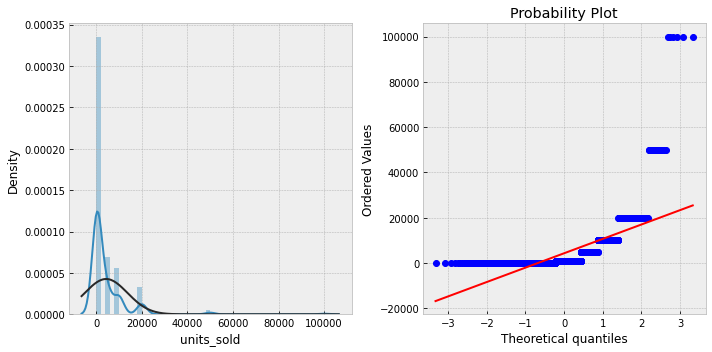

In [160]:
### performing a log transformation
%matplotlib inline
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df_new['units_sold'], fit=norm)

plt.subplot(1,2,2)
res = stats.probplot(df_new['units_sold'], plot=plt)
plt.tight_layout()

<ipython-input-161-2e2a767eb307>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['rating_count'], fit=norm)


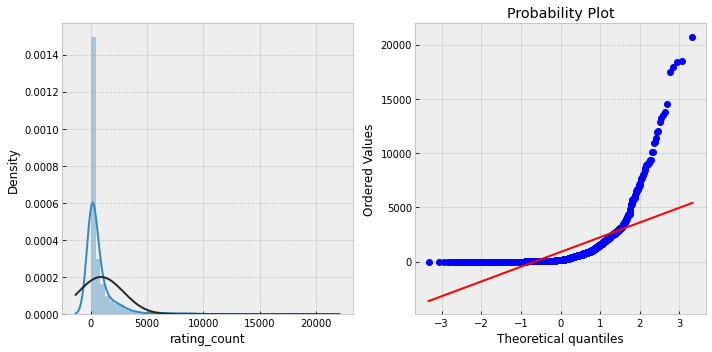

In [161]:
### performing a log transformation
%matplotlib inline
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df_new['rating_count'], fit=norm)

plt.subplot(1,2,2)
res = stats.probplot(df_new['rating_count'], plot=plt)
plt.tight_layout()

<ipython-input-162-a4dbe9900b87>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['merchant_rating_count'], fit=norm)


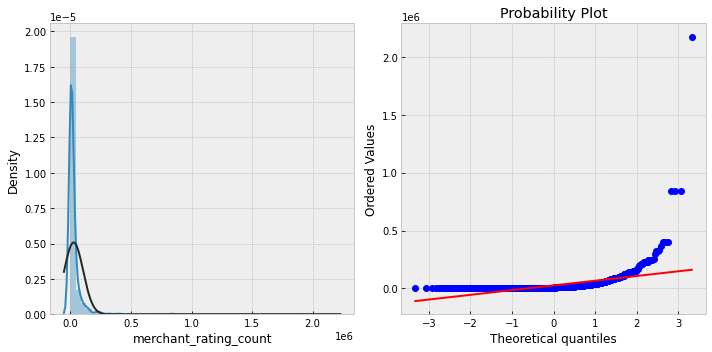

In [162]:
### performing a log transformation
%matplotlib inline
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df_new['merchant_rating_count'], fit=norm)

plt.subplot(1,2,2)
res = stats.probplot(df_new['merchant_rating_count'], plot=plt)
plt.tight_layout()

<ipython-input-163-5a00473119d8>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['product_variation_inventory'], fit=norm)


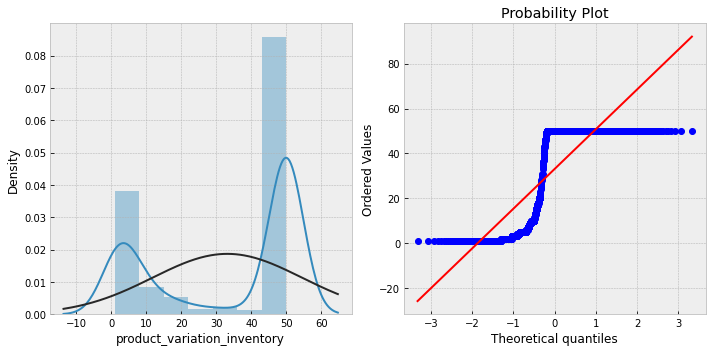

In [163]:
### performing a log transformation
%matplotlib inline
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df_new['product_variation_inventory'], fit=norm)

plt.subplot(1,2,2)
res = stats.probplot(df_new['product_variation_inventory'], plot=plt)
plt.tight_layout()

<ipython-input-164-be1f07ffb846>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['countries_shipped_to'], fit=norm)


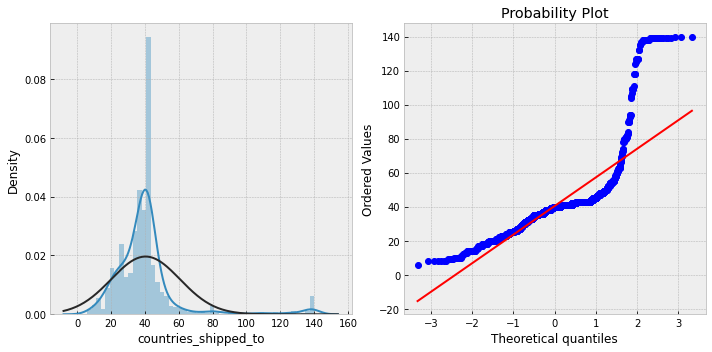

In [164]:
### performing a log transformation
%matplotlib inline
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df_new['countries_shipped_to'], fit=norm)

plt.subplot(1,2,2)
res = stats.probplot(df_new['countries_shipped_to'], plot=plt)
plt.tight_layout()

<ipython-input-165-d8d77ca29947>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['inventory_total'], fit=norm)


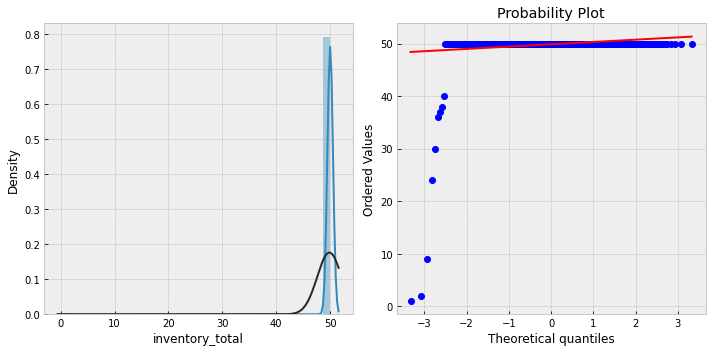

In [165]:
### performing a log transformation
%matplotlib inline
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df_new['inventory_total'], fit=norm)

plt.subplot(1,2,2)
res = stats.probplot(df_new['inventory_total'], plot=plt)
plt.tight_layout()

<ipython-input-166-55a98edbf07b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['merchant_positive_pct'], fit=norm)


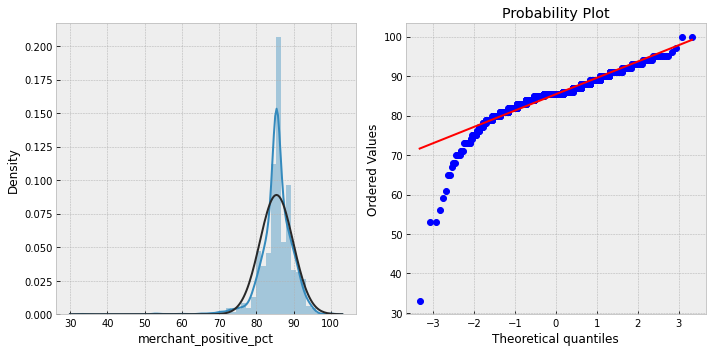

In [166]:
### performing a log transformation
%matplotlib inline
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df_new['merchant_positive_pct'], fit=norm)

plt.subplot(1,2,2)
res = stats.probplot(df_new['merchant_positive_pct'], plot=plt)
plt.tight_layout()

**Perform the normalization**

In [167]:
#Normalize by take the log

def getLog(x):
    return np.log(x + 1)

df_new['price']  = df_new['price'].apply(getLog)
df_new['retail_price']  = df_new['retail_price'].apply(getLog)
df_new['units_sold']  = df_new['units_sold'].apply(getLog)
df_new['rating_count']  = df_new['rating_count'].apply(getLog)
df_new['product_variation_inventory']  = df_new['product_variation_inventory'].apply(getLog)
df_new['countries_shipped_to']  = df_new['countries_shipped_to'].apply(getLog)
df_new['inventory_total']  = df_new['inventory_total'].apply(getLog)
df_new['merchant_positive_pct']  = df_new['merchant_positive_pct'].apply(getLog)

#**Split Train & Test files**

In [168]:
train_index = df1.shape[0]             #number of rows train_new dataset 
train_data_cleaned = df_new.iloc[:train_index-1]    
print(train_data_cleaned.shape)

test_data_cleaned = df_new.iloc[train_index-1 :]
print(test_data_cleaned.shape)

test_data_cleaned.drop('rating', axis=1, inplace=True)
print(test_data_cleaned.shape)

(1093, 23)
(479, 23)
(479, 22)


<ipython-input-168-66b0c8ab65a6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_cleaned.drop('rating', axis=1, inplace=True)


In [169]:
test_data_cleaned.head()

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,...,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,merchant_rating_count,merchant_rating,merchant_has_profile_picture,merchant_positive_pct
1093,1.909543,1.791759,2.397895,1,0.000000,0,0,0,0,58,...,1.791759,2,4.941642,3.931826,0,0,3,2.333333,0,3.526361
1094,2.079442,2.079442,8.517393,0,6.363028,0,0,0,0,845,...,3.931826,2,3.465736,3.931826,0,0,4213,4.058391,0,4.465908
1095,1.791759,2.833213,6.908755,1,4.143135,0,0,0,0,1081,...,3.044522,2,3.737670,3.931826,0,0,10501,4.029235,0,4.454347
1096,2.944439,3.332205,8.517393,1,7.551712,0,0,0,0,1097,...,3.931826,5,3.761200,3.931826,0,0,15855,4.052917,0,4.465908
1097,2.564949,4.406719,9.903538,0,7.495542,0,0,0,0,172,...,3.931826,3,3.663562,3.931826,0,0,151914,4.127921,0,4.488636


#**Apply DT model on train file**

In [170]:
train_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1093 non-null   float64
 1   retail_price                  1093 non-null   float64
 2   units_sold                    1093 non-null   float64
 3   uses_ad_boosts                1093 non-null   int64  
 4   rating                        1093 non-null   float64
 5   rating_count                  1093 non-null   float64
 6   badges_count                  1093 non-null   int64  
 7   badge_local_product           1093 non-null   int64  
 8   badge_product_quality         1093 non-null   int64  
 9   badge_fast_shipping           1093 non-null   int64  
 10  tags                          1093 non-null   int64  
 11  product_color                 1093 non-null   int64  
 12  product_variation_size_id     1093 non-null   int64  
 13  pro

In [171]:
# splitting data to features and label(rating)
X_train = train_data_cleaned.drop('rating',axis=1)
y_train = train_data_cleaned['rating']

In [172]:
#using Decision Tree algorithm to train the model
DT1 = DecisionTreeClassifier()  #default algorithm
DT2 = DecisionTreeClassifier(max_depth=10,random_state=42) # hyperparametered algorithm

#fitting the models on train file
DT1.fit(X_train, y_train)
DT2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

**Observation:**  In the hyperparametered algorithm, I increased the number of trees I want to build before taking the maximum voting or averages of predictions. Because higher number of trees gives better performance.

In [173]:
#predict the output of the train file
y1= DT1.predict(X_train)
y2= DT2.predict(X_train)

*First Model*

In [174]:
#display the train accuracy
acc= accuracy_score(y_train,y1)
print('Train Accuracy: ',acc,'\n')

#display the train f1 score
f1= f1_score(y_train, y1, average='weighted')
print('Train f1 score: ',f1,'\n')

Train Accuracy:  0.9981701738334858 

Train f1 score:  0.9981857174076697 



*Second Model*

In [175]:
#display the train accuracy
acc= accuracy_score(y_train,y2)
print('Train Accuracy: ',acc,'\n')

#display the train f1 score
DT_f1= f1_score(y_train, y2, average='weighted')
print('Train f1 score: ',f1,'\n')

Train Accuracy:  0.9268069533394327 

Train f1 score:  0.9981857174076697 



**Observation** Both 2 models are better so i will use the second one of them with predicting the (test file)

# **Feature Importance and Feature Selection with DT**

In [176]:
col=list(X_train.columns)
col

['price',
 'retail_price',
 'units_sold',
 'uses_ad_boosts',
 'rating_count',
 'badges_count',
 'badge_local_product',
 'badge_product_quality',
 'badge_fast_shipping',
 'tags',
 'product_color',
 'product_variation_size_id',
 'product_variation_inventory',
 'shipping_option_price',
 'countries_shipped_to',
 'inventory_total',
 'has_urgency_banner',
 'urgency_text',
 'merchant_rating_count',
 'merchant_rating',
 'merchant_has_profile_picture',
 'merchant_positive_pct']

In [177]:
## feature importance
feature_importances = pd.DataFrame(DT1.feature_importances_,
                                   index = col,
                                    columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False)

,importance
rating_count,0.229506
merchant_rating,0.124944
merchant_rating_count,0.118487
tags,0.101061
price,0.063067
badge_product_quality,0.056632
countries_shipped_to,0.052231
merchant_positive_pct,0.047025
product_color,0.044824
retail_price,0.035296


we will take the first 10 feature and train the model with them

In [178]:
test_data_cleaned=test_data_cleaned[['rating_count',
'merchant_rating_count',	
'merchant_rating',	
'tags',	
'merchant_positive_pct',	
'price',	
'badge_product_quality',	
'countries_shipped_to',	
'retail_price',	
'product_color']]
train_data_cleaned=train_data_cleaned[['rating_count',
'merchant_rating_count',	
'merchant_rating',	
'tags',	
'merchant_positive_pct',	
'price',	
'badge_product_quality',	
'countries_shipped_to',	
'retail_price',	
'product_color','rating']]

In [179]:
train_data_cleaned.head()

,rating_count,merchant_rating_count,merchant_rating,tags,merchant_positive_pct,price,badge_product_quality,countries_shipped_to,retail_price,product_color,rating
0,7.421178,66644,4.137582,766,4.488636,2.197225,0,3.433987,2.079442,94,4.0
1,6.738152,25752,4.256873,895,4.521789,2.197225,0,3.637586,2.079442,8,4.0
2,2.397895,3897,3.928920,665,4.430817,1.945910,0,3.737670,3.555348,84,4.0
3,4.418841,7497,4.079365,565,4.477337,1.735189,0,3.258097,1.609438,40,3.0
4,4.852030,173,4.306358,321,4.521789,2.197225,0,2.772589,2.484907,3,4.0


In [180]:
# splitting data to features and label(rating)
X_train = train_data_cleaned.drop('rating',axis=1)
y_train = train_data_cleaned['rating']

In [181]:
DT = DecisionTreeClassifier(max_depth=10,random_state=42) 
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

#**Apply DT model on test file**

In [182]:
#predict the output of the test file & saving it in csv file called('pred_walkthrough)
df2['id']

pred_test = DT.predict(test_data_cleaned)
pred_df = pd.DataFrame(data={'id': np.asarray( df2['id']), 'rating': pred_test})
pred_df.to_csv('DTpred_walkthrough.csv', index=False)

In [183]:
y_pred= pd.DataFrame(np.array(pred_test))
y_pred.value_counts()

4.0    367
3.0     60
5.0     50
2.0      2
dtype: int64

# **Apply SVC model on train file**

In [184]:
#scaling the train file
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

**Observation:** Svm works well with scaling the features, So i use standar scaler technique for applying the scaling on data.

In [185]:
SVC = SVC(C=100,gamma=.01)
SVC.fit(X_train_scaled, y_train)


SVC(C=100, gamma=0.01)

In [186]:
#predict the output of the train file from the 3 models
y_SVC= SVC.predict(X_train_scaled)


In [187]:
#display the train accuracy
acc= accuracy_score(y_train,y_SVC)
print('Train Accuracy: ',acc,'\n')

#display the train f1 score
svc_f1= f1_score(y_train, y_SVC, average='weighted')
print('Train f1 score: ',f1,'\n')

Train Accuracy:  0.7996340347666971 

Train f1 score:  0.9981857174076697 



# **Apply NB model on train file**

**Multinomial naive Bayes** assumes to have feature vector where each element represents the number of times it appears (or, very often, its frequency).*

**The Gaussian Naive Bayes**, instead, is based on a continuous distribution and it's suitable for more generic classification tasks.*

**The categorical Naive Bayes** is suitable for classification with discrete features that are categorically distributed. The categories of each feature are drawn from a categorical distribution.

So (The categorical Naive Bayes) is the best suitable solution for our problem, but let me try the 3 to make sure from ny knowledge.

In [188]:
#using different 3 objects from Naive bayes algorithm to train the model
GNB= MultinomialNB()   #Gaussian Naive Bayes
MNB= MultinomialNB()   # Multinomial Naive Bayes
CNB= CategoricalNB()   # Categorical Naive Bayes

#fitting the models on data
GNB.fit(X_train, y_train)
MNB.fit(X_train, y_train)
CNB.fit(X_train, y_train)

CategoricalNB()

In [189]:
#predict the output of the train file from the 3 models
y_GNB= GNB.predict(X_train)
y_MNB= MNB.predict(X_train)
y_CNB= CNB.predict(X_train)

##Gaussian

In [190]:
#display the train accuracy
acc= accuracy_score(y_train,y_GNB)
print('Train Accuracy: ',acc,'\n')

#display the train f1 score
f1= f1_score(y_train, y_GNB, average='weighted')
print('Train f1 score: ',f1,'\n')

Train Accuracy:  0.09972552607502287 

Train f1 score:  0.13388811258418007 



##Multinominal

In [191]:
#display the train accuracy
acc= accuracy_score(y_train,y_MNB)
print('Train Accuracy: ',acc,'\n')

#display the train f1 score
f1= f1_score(y_train, y_MNB, average='weighted')
print('Train f1 score: ',f1,'\n')

Train Accuracy:  0.09972552607502287 

Train f1 score:  0.13388811258418007 



##CategoricalNB

In [192]:
#display the train accuracy
acc= accuracy_score(y_train,y_CNB)
print('Train Accuracy: ',acc,'\n')

#display the train f1 score
nb_f1= f1_score(y_train, y_CNB, average='weighted')
print('Train f1 score: ',f1,'\n')

Train Accuracy:  0.8966148215919487 

Train f1 score:  0.13388811258418007 



**Result** 
The categorical Naive Bayes is the best model out of the 3 models in our problem.

# **Results**

In [195]:
model_ev = pd.DataFrame({'Model': ['Naive Bayes','Decision Tree','Support Vector Machine'],
                         'F1 Score': [nb_f1*100,DT_f1*100,svc_f1*100]})


model_ev

,Model,F1 Score
0,Naive Bayes,88.447396
1,Decision Tree,92.459385
2,Support Vector Machine,75.232148
